# Assignment 1


The questions below relate to the data files associated with the contest with the title 'DengAI: Predicting Disease Spread' published at the following website. https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/data/

Anyone can join the contest and showcase your skills. To know about contest submissions visit the following webpage https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/submissions/

You can showcase your Machine Learning skills by ranking top in the contest.

Problem description:

Your goal is to predict the total_cases label for each (city, year, weekofyear) in the test set. There are two cities, San Juan and Iquitos, with test data for each city spanning 5 and 3 years respectively. You will make one submission that contains predictions for both cities. The data for each city have been concatenated along with a city column indicating the source: sj for San Juan and iq for Iquitos. The test set is a pure future hold-out, meaning the test data are sequential and non-overlapping with any of the training data. Throughout, missing values have been filled as NaNs.

Assignment:

The goal is achieved through three subsequent Assignments 1, 2 and 3, all using the same dataset

The features in this dataset You are provided the following set of information on a (year, weekofyear) timescale:

(Where appropriate, units are provided as a _unit suffix on the feature name.)

City and date indicators

city – City abbreviations: sj for San Juan and iq for Iquitos
week_start_date – Date given in yyyy-mm-dd format

NOAA's GHCN daily climate data weather station measurements

station_max_temp_c – Maximum temperature

station_min_temp_c – Minimum temperature

station_avg_temp_c – Average temperature

station_precip_mm – Total precipitation
station_diur_temp_rng_c – Diurnal temperature range

PERSIANN satellite precipitation measurements (0.25x0.25 degree scale)

precipitation_amt_mm – Total precipitation

NOAA's NCEP Climate Forecast System Reanalysis measurements (0.5x0.5 degree scale)


reanalysis_sat_precip_amt_mm – Total precipitation

reanalysis_dew_point_temp_k – Mean dew point temperature

reanalysis_air_temp_k – Mean air temperature

reanalysis_relative_humidity_percent – Mean relative humidity

reanalysis_specific_humidity_g_per_kg – Mean specific humidity

reanalysis_precip_amt_kg_per_m2 – Total precipitation

reanalysis_max_air_temp_k – Maximum air temperature

reanalysis_min_air_temp_k – Minimum air temperature

reanalysis_avg_temp_k – Average air temperature

reanalysis_tdtr_k – Diurnal temperature range

Satellite vegetation - Normalized difference vegetation index (NDVI) - NOAA's CDR Normalized Difference Vegetation Index (0.5x0.5 degree scale) measurements

ndvi_se – Pixel southeast of city centroid

ndvi_sw – Pixel southwest of city centroid

ndvi_ne – Pixel northeast of city centroid

ndvi_nw – Pixel northwest of city centroid

In [1]:
#import required libraries like pandas, numpy, matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
from numpy import mean
from numpy import std

In [2]:
#read the train data into dataframe
dengue_train = pd.read_csv("dengue_features_train.csv") 

In [3]:
#view first 3 rows of the dataframe
dengue_train.head(3)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.12260,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.16990,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.03225,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4


In [4]:
#display a quick overview of the dataset
dengue_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null object
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_air_temp_k                    1446 non-null float64
reanalysis_avg_temp_k                    1446 non-null float64
reanalysis_dew_point_temp_k              1446 non-null float64
reanalysis_max_air_temp_k                1446 non-null float64
reanalysis_min_air_temp_k                1446 non-null float64
reanalysis_precip

In [5]:
#display number of rows and columns in the dataframe
dengue_train.shape

(1456, 24)

In [6]:
#display names of the columns in the dataframe
dengue_train.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

#### 1. Renaming the column names

a). Rename columns which have 'station' such that 'station' is abbreviated to 'stn' 

In [7]:
dengue_train.columns = dengue_train.columns.str.replace("station","stn")

b). Rename columns which have 'reanalysis' to abbreviate 're_an'

In [8]:
dengue_train.columns = dengue_train.columns.str.replace("reanalysis","re_an")

c). Rename columns which have 'humidity' to abbreviate to 'hd'

In [9]:
dengue_train.columns = dengue_train.columns.str.replace("humidity","hd")

d). Abbreviate 'precipitation' part of column name to 'prec'

In [10]:
dengue_train.columns = dengue_train.columns.str.replace("precipitation","prec")

 e). View top 3 rows and recheck if column name changes have taken effect 

In [11]:
dengue_train.head(3)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,prec_amt_mm,re_an_air_temp_k,...,re_an_precip_amt_kg_per_m2,re_an_relative_hd_percent,re_an_sat_precip_amt_mm,re_an_specific_hd_g_per_kg,re_an_tdtr_k,stn_avg_temp_c,stn_diur_temp_rng_c,stn_max_temp_c,stn_min_temp_c,stn_precip_mm
0,sj,1990,18,1990-04-30,0.12260,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.16990,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.03225,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4


f). Check the type of columns in dataframe

In [12]:
print(type(dengue_train.columns)) #display the type of the column

<class 'pandas.core.indexes.base.Index'>


In [13]:
 dengue_train.dtypes  #display the datatypes for each column

city                           object
year                            int64
weekofyear                      int64
week_start_date                object
ndvi_ne                       float64
ndvi_nw                       float64
ndvi_se                       float64
ndvi_sw                       float64
prec_amt_mm                   float64
re_an_air_temp_k              float64
re_an_avg_temp_k              float64
re_an_dew_point_temp_k        float64
re_an_max_air_temp_k          float64
re_an_min_air_temp_k          float64
re_an_precip_amt_kg_per_m2    float64
re_an_relative_hd_percent     float64
re_an_sat_precip_amt_mm       float64
re_an_specific_hd_g_per_kg    float64
re_an_tdtr_k                  float64
stn_avg_temp_c                float64
stn_diur_temp_rng_c           float64
stn_max_temp_c                float64
stn_min_temp_c                float64
stn_precip_mm                 float64
dtype: object

g). Change the column 'year' as categorical variable

In [14]:
dengue_train.year = dengue_train.year.astype("category")  #change the datatype of year column to categorical

In [15]:
dengue_train["year"].dtypes 

CategoricalDtype(categories=[1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
                  2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
                  2010],
                 ordered=False)

In [16]:
#read the dengue_labels_train dataset into another dataframe
dengue_labels = pd.read_csv("dengue_labels_train.csv")  
dengue_labels.head()


,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [17]:
#dengue_labels.dtypes

In [18]:
#merge the above two dataframes on city, year and weekofyear and store it into new dataframe
merged_train_labels = pd.merge(dengue_train,dengue_labels, on= ["city",'year','weekofyear'])
print(merged_train_labels.head(3))
print(merged_train_labels.shape)

  city  year  weekofyear week_start_date  ndvi_ne   ndvi_nw   ndvi_se  \
0   sj  1990          18      1990-04-30  0.12260  0.103725  0.198483   
1   sj  1990          19      1990-05-07  0.16990  0.142175  0.162357   
2   sj  1990          20      1990-05-14  0.03225  0.172967  0.157200   

    ndvi_sw  prec_amt_mm  re_an_air_temp_k  ...  re_an_relative_hd_percent  \
0  0.177617        12.42        297.572857  ...                  73.365714   
1  0.155486        22.82        298.211429  ...                  77.368571   
2  0.170843        34.54        298.781429  ...                  82.052857   

   re_an_sat_precip_amt_mm  re_an_specific_hd_g_per_kg  re_an_tdtr_k  \
0                    12.42                   14.012857      2.628571   
1                    22.82                   15.372857      2.371429   
2                    34.54                   16.848571      2.300000   

   stn_avg_temp_c  stn_diur_temp_rng_c  stn_max_temp_c  stn_min_temp_c  \
0       25.442857             6

In [19]:
#display the count of null values for each attribute
merged_train_labels.isna().sum()

city                            0
year                            0
weekofyear                      0
week_start_date                 0
ndvi_ne                       194
ndvi_nw                        52
ndvi_se                        22
ndvi_sw                        22
prec_amt_mm                    13
re_an_air_temp_k               10
re_an_avg_temp_k               10
re_an_dew_point_temp_k         10
re_an_max_air_temp_k           10
re_an_min_air_temp_k           10
re_an_precip_amt_kg_per_m2     10
re_an_relative_hd_percent      10
re_an_sat_precip_amt_mm        13
re_an_specific_hd_g_per_kg     10
re_an_tdtr_k                   10
stn_avg_temp_c                 43
stn_diur_temp_rng_c            43
stn_max_temp_c                 20
stn_min_temp_c                 14
stn_precip_mm                  22
total_cases                     0
dtype: int64

We can see that there are missing values for several attributes, let's try handle them -

In [20]:
#fill the null  values using forward fill method
merged_train_labels = merged_train_labels.fillna(method="ffill")

In [21]:
merged_train_labels.isna().sum()

city                          0
year                          0
weekofyear                    0
week_start_date               0
ndvi_ne                       0
ndvi_nw                       0
ndvi_se                       0
ndvi_sw                       0
prec_amt_mm                   0
re_an_air_temp_k              0
re_an_avg_temp_k              0
re_an_dew_point_temp_k        0
re_an_max_air_temp_k          0
re_an_min_air_temp_k          0
re_an_precip_amt_kg_per_m2    0
re_an_relative_hd_percent     0
re_an_sat_precip_amt_mm       0
re_an_specific_hd_g_per_kg    0
re_an_tdtr_k                  0
stn_avg_temp_c                0
stn_diur_temp_rng_c           0
stn_max_temp_c                0
stn_min_temp_c                0
stn_precip_mm                 0
total_cases                   0
dtype: int64

**Now, there are no null values in the merged_train_label dataset**

2.a). Do a random check by printing few values from both files and merged file

In [22]:
#random check for few values from both the dataset and the merged dataset
#dengue_train.iloc[4]

dengue_train.sample()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,prec_amt_mm,re_an_air_temp_k,...,re_an_precip_amt_kg_per_m2,re_an_relative_hd_percent,re_an_sat_precip_amt_mm,re_an_specific_hd_g_per_kg,re_an_tdtr_k,stn_avg_temp_c,stn_diur_temp_rng_c,stn_max_temp_c,stn_min_temp_c,stn_precip_mm
622,sj,2002,16,2002-04-16,NaN,NaN,0.203971,0.177186,0.0,297.044286,...,22.4,73.84,0.0,13.638571,2.657143,25.457143,5.714286,30.0,21.7,17.8


In [23]:
dengue_labels.iloc[133]

city             sj
year           1992
weekofyear       47
total_cases      47
Name: 133, dtype: object

In [24]:
merged_train_labels.iloc[133]

city                                  sj
year                                1992
weekofyear                            47
week_start_date               1992-11-18
ndvi_ne                           0.0764
ndvi_nw                        0.0561333
ndvi_se                         0.134371
ndvi_sw                        0.0640143
prec_amt_mm                        43.44
re_an_air_temp_k                 298.343
re_an_avg_temp_k                 298.286
re_an_dew_point_temp_k           294.653
re_an_max_air_temp_k               300.6
re_an_min_air_temp_k               296.6
re_an_precip_amt_kg_per_m2         49.97
re_an_relative_hd_percent        80.2557
re_an_sat_precip_amt_mm            43.44
re_an_specific_hd_g_per_kg       16.0671
re_an_tdtr_k                     1.82857
stn_avg_temp_c                   26.6857
stn_diur_temp_rng_c                    7
stn_max_temp_c                      31.1
stn_min_temp_c                      22.2
stn_precip_mm                       26.1
total_cases     

In [25]:
dengue_train.iloc[880]

city                                  sj
year                                2007
weekofyear                            14
week_start_date               2007-04-02
ndvi_ne                        0.0188667
ndvi_nw                          0.03325
ndvi_se                         0.187057
ndvi_sw                         0.163843
prec_amt_mm                        90.68
re_an_air_temp_k                 297.777
re_an_avg_temp_k                 297.864
re_an_dew_point_temp_k            293.27
re_an_max_air_temp_k               299.9
re_an_min_air_temp_k               296.5
re_an_precip_amt_kg_per_m2          36.3
re_an_relative_hd_percent        76.2143
re_an_sat_precip_amt_mm            90.68
re_an_specific_hd_g_per_kg       14.7729
re_an_tdtr_k                     2.07143
stn_avg_temp_c                      25.6
stn_diur_temp_rng_c              6.01429
stn_max_temp_c                        30
stn_min_temp_c                      21.7
stn_precip_mm                       40.2
Name: 880, dtype

In [26]:
dengue_labels.iloc[880]

city             sj
year           2007
weekofyear       14
total_cases       3
Name: 880, dtype: object

In [27]:
merged_train_labels.iloc[880]

city                                  sj
year                                2007
weekofyear                            14
week_start_date               2007-04-02
ndvi_ne                        0.0188667
ndvi_nw                          0.03325
ndvi_se                         0.187057
ndvi_sw                         0.163843
prec_amt_mm                        90.68
re_an_air_temp_k                 297.777
re_an_avg_temp_k                 297.864
re_an_dew_point_temp_k            293.27
re_an_max_air_temp_k               299.9
re_an_min_air_temp_k               296.5
re_an_precip_amt_kg_per_m2          36.3
re_an_relative_hd_percent        76.2143
re_an_sat_precip_amt_mm            90.68
re_an_specific_hd_g_per_kg       14.7729
re_an_tdtr_k                     2.07143
stn_avg_temp_c                      25.6
stn_diur_temp_rng_c              6.01429
stn_max_temp_c                        30
stn_min_temp_c                      21.7
stn_precip_mm                       40.2
total_cases     

2.b). Do a scatter plot of weekofyear on x-axis and total_cases on y-axis and observe if there is a relationship.

city
iq    AxesSubplot(0.125,0.125;0.775x0.755)
sj    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

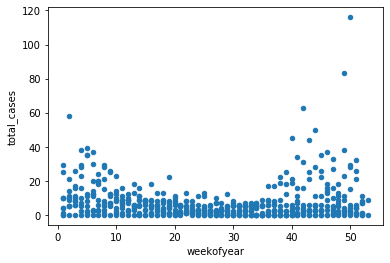

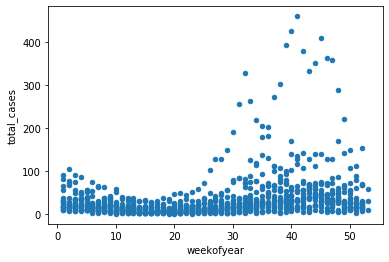

In [28]:
#scatter plot between weekofyear and total_case grouped by city
city_group = merged_train_labels.groupby("city")
city_group.plot(x ="weekofyear", y= "total_cases",kind="scatter")


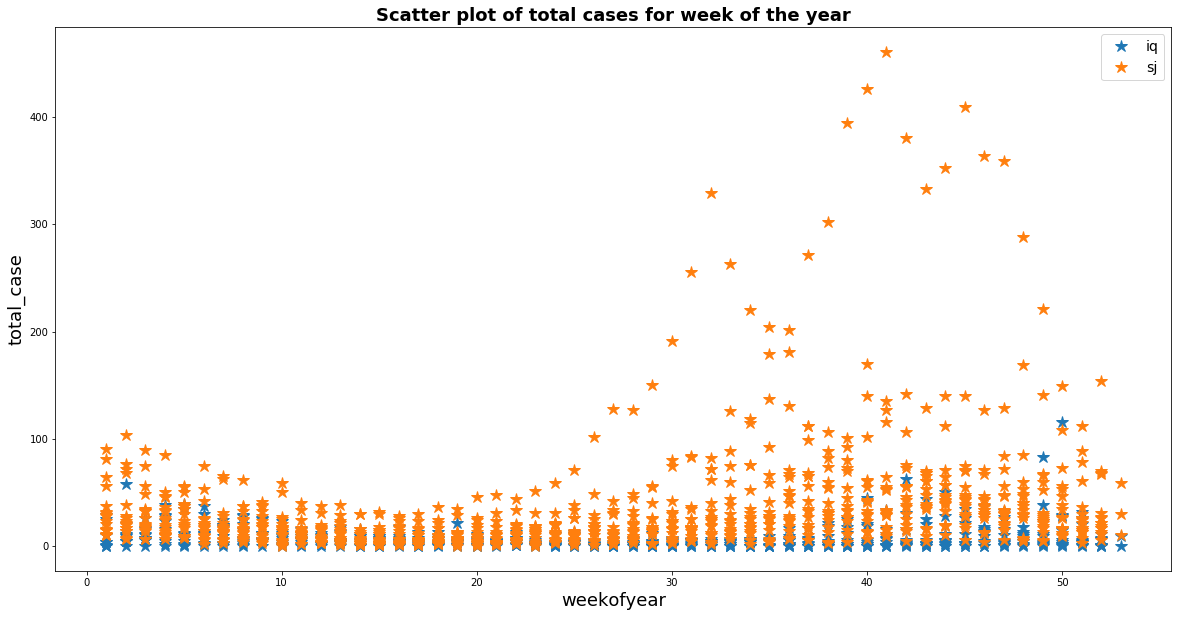

In [29]:
fig, ax = plt.subplots(figsize=(20,10))
ax.margins(0.05)
for name, group in city_group:
    ax.plot(group.weekofyear, group.total_cases, marker='*', linestyle='', ms=12, label=name)
ax.legend(loc=1, prop={'size': 14})
plt.xlabel("weekofyear", fontsize=18)
plt.ylabel("total_case", fontsize = 18)
plt.title("Scatter plot of total cases for week of the year", fontsize=18,fontweight="bold")
plt.show()

From the above two plots,we can say that

* There are more number of dengue cases during starting few weeks of the year and then lesser cases for weeks between 10 and 25 for San Juan and weeks 10 and 30 for Iquitos followed with increase in number of cases in later weeks of several years for both the cities.
* There are more total_cases of dengue in San Juan than Iquitos.

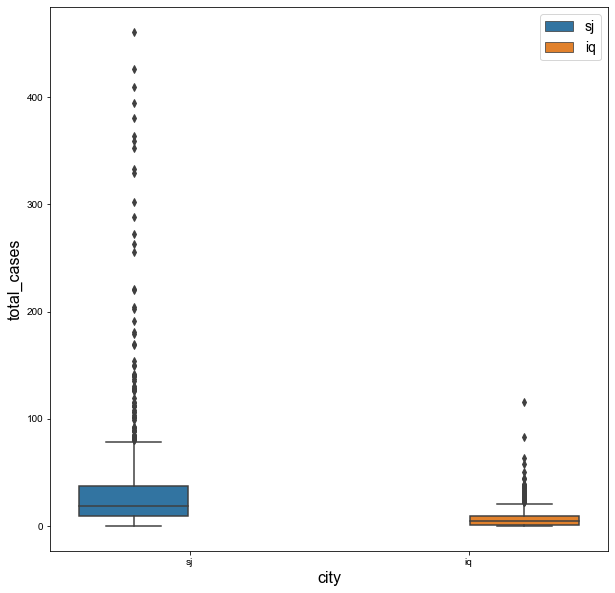

In [30]:
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.boxplot(x="city", y="total_cases",data=merged_train_labels,hue="city",ax=ax)
ax.set_xlabel("city", fontsize = 16)
ax.set_ylabel("total_cases", fontsize = 16)
ax.legend(fontsize=14)
sns.set(font_scale = 2)

According to the distribution of total_case in two cities, it can be inferred that 
* The distribution of total_cases for san juan is right-skewed while it seems to be symmetric for iquitos.
* There are several outliers for both the cities. 
* There is more variability in data points of total_cases for city San Juan than Iquitos.

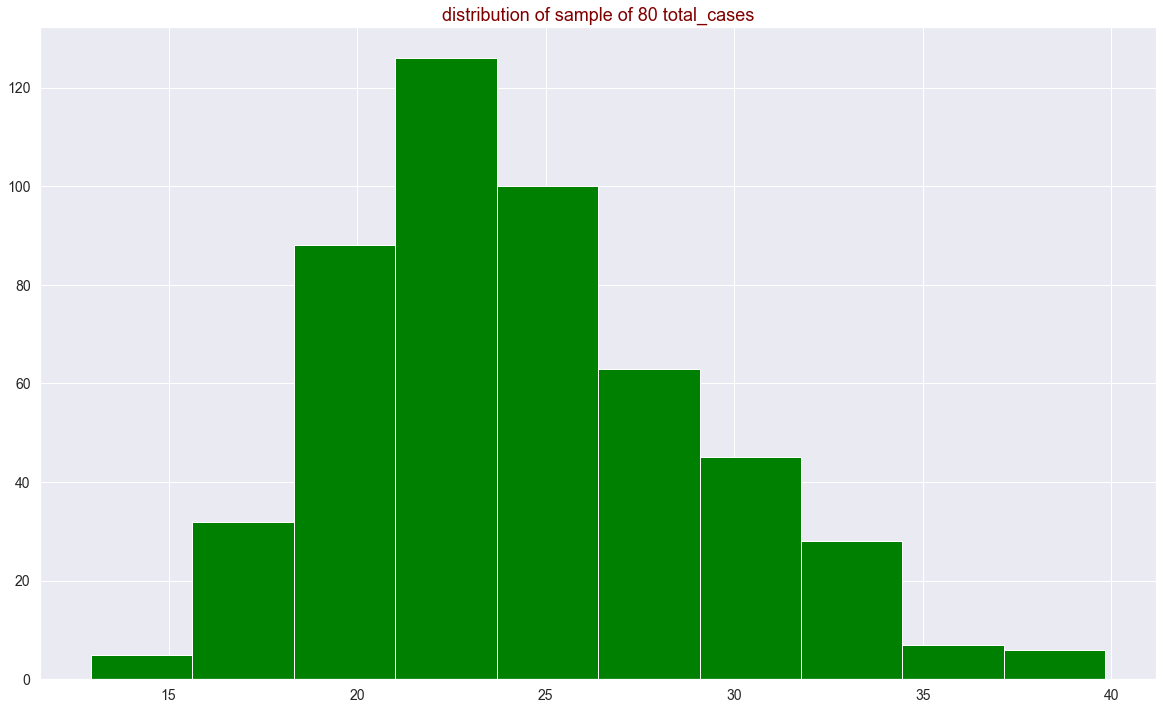

In [31]:
# seed the random number generator
random.seed(10)
# calculate the mean of 80 instances of total_cases 500 times

sample_80 = [(merged_train_labels.total_cases.sample(80).mean()) for _i in range(500)]

# plot the distribution of sample means
fig, ax = plt.subplots(figsize=(20,12))
plt.hist(sample_80,color="green")
plt.title("distribution of sample of 80 total_cases",fontsize= 18, color="maroon")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

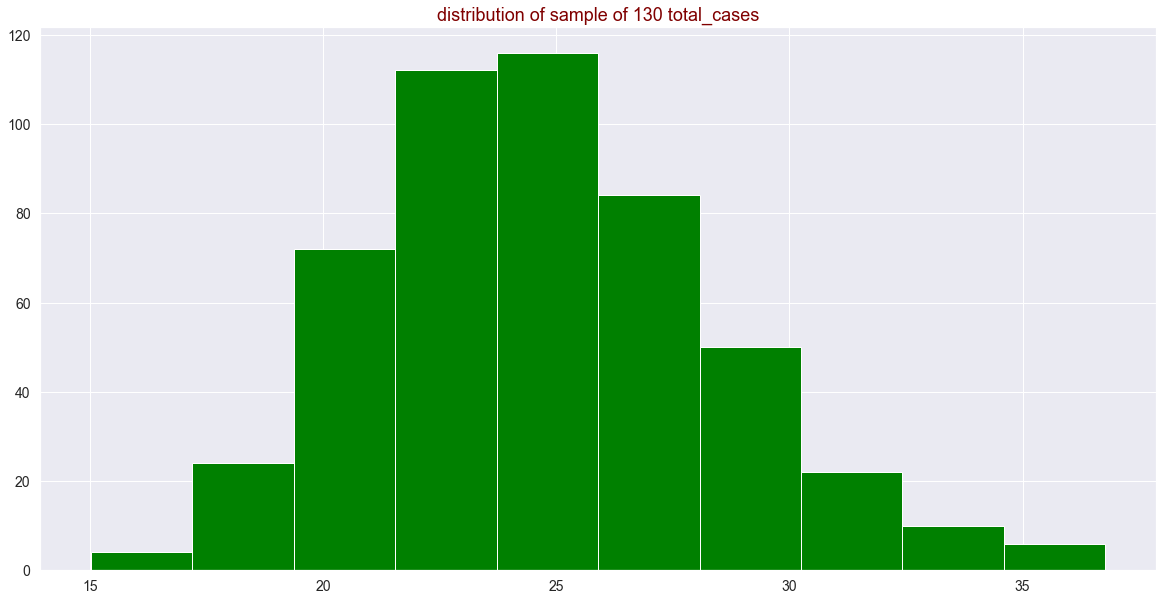

In [32]:
# seed the random number generator
random.seed(10)
# calculate the mean of 130 instances of total_cases 500 times

sample_130 = [(merged_train_labels.total_cases.sample(130).mean()) for _i in range(500)]

# plot the distribution of sample means
fig, ax = plt.subplots(figsize=(20,10))
plt.hist(sample_130,color="green")
plt.title("distribution of sample of 130 total_cases",fontsize= 18, color="maroon")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [33]:
print("The mean of total population:",merged_train_labels.total_cases.mean())
print("The standard deviation of total population:",merged_train_labels.total_cases.std())
print('The mean of the sample means of sample size 80: {}'.format(mean(sample_80)))
print('The standard deviation of the sample means of sample size 80: {}'.format(std(sample_80)))
print('The mean of the sample means of sample size 130: {}'.format(mean(sample_130)))
print('The standard deviation of the sample means of sample size 130: {}'.format(std(sample_130)))

The mean of total population: 24.67513736263736
The standard deviation of total population: 43.5960001631074
The mean of the sample means of sample size 80: 24.4041
The standard deviation of the sample means of sample size 80: 4.717564858059717
The mean of the sample means of sample size 130: 24.686799999999998
The standard deviation of the sample means of sample size 130: 3.6757924826334545


The analysis performed above is done on total cases by randomly taking two samples of size 80 and 130 from the total population. Below conditions were taken into account-
* Each sample represent random sample from the total population.
* The sample size is lesser than the 10% of the total population.
* The sample size is large enough that sample size is greater than 10.

As per the output above we see that as the sample size increases the sample mean tends to be normally distributed around the population mean and its standard deviation shrinks as the sample size increases.

**Hence it complies with the Central Limit Theorem**

Similary, the distribution can be checked for other attributes as well.

d). Find the mean, min, max and standard deviation of total_cases by city

In [34]:
#create a dataframe using group by city
grouped_df = merged_train_labels.groupby("city")
print(type(grouped_df))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [35]:
#mean of total_cases of dengue in both the city
grouped_df["total_cases"].mean()

city
iq     7.565385
sj    34.180556
Name: total_cases, dtype: float64

In [36]:
#minimum value of total_cases of dengue in both the city
grouped_df["total_cases"].min()

city
iq    0
sj    0
Name: total_cases, dtype: int64

In [37]:
#maximum value of total_cases of dengue in both the city
grouped_df["total_cases"].max()

city
iq    116
sj    461
Name: total_cases, dtype: int64

In [38]:
#standard deviation for total_cases of dengue for both the city
grouped_df["total_cases"].std()

city
iq    10.765478
sj    51.381372
Name: total_cases, dtype: float64

In [39]:
grouped_df["total_cases"].median()

city
iq     5
sj    19
Name: total_cases, dtype: int64

2.e). Read the relationship between mean and standard deviation and  describe the data of total_cases by city

From the above analysis we can say that:
* The mean value of total_case for both the cities is more than its median which means that the distribution is positively skewed.
* Most of the data points lie in the range of +_10.8 around the mean of 7.6 for the city Iquitos.
* Most of the data points lie in the range of +_51 around the mean of 34 for the city San Juan.

Hence, we can say that there is more variation in San Juan total cases data points than Iquitos.

3. How many years in the city iq have greater than or equal to 50 total_cases of dengue and in which years?

In [40]:
#display the city iq having total_cases greater than 50.
year_count = merged_train_labels[(merged_train_labels["total_cases"] >= 50) & (merged_train_labels["city"] == "iq")]

In [41]:
year_count

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,prec_amt_mm,re_an_air_temp_k,...,re_an_relative_hd_percent,re_an_sat_precip_amt_mm,re_an_specific_hd_g_per_kg,re_an_tdtr_k,stn_avg_temp_c,stn_diur_temp_rng_c,stn_max_temp_c,stn_min_temp_c,stn_precip_mm,total_cases
1166,iq,2004,49,2004-12-02,0.201943,0.159367,0.159043,0.241086,53.01,299.177143,...,87.130000,53.01,18.110000,10.957143,27.90,11.00,34.1,22.4,64.0,83
1167,iq,2004,50,2004-12-09,0.323429,0.309514,0.275829,0.335900,70.04,297.787143,...,93.938571,70.04,18.207143,6.500000,27.90,11.00,34.1,22.4,9.9,116
1327,iq,2008,2,2008-01-08,0.444933,0.275850,0.356900,0.469729,71.84,296.095714,...,95.280000,71.84,16.681429,5.100000,25.80,6.30,31.4,22.6,104.4,58
1367,iq,2008,42,2008-10-14,0.288200,0.227857,0.280757,0.357971,69.39,298.350000,...,88.857143,69.39,17.527143,9.971429,26.45,9.10,34.7,21.0,24.9,63
1369,iq,2008,44,2008-10-28,0.161743,0.196200,0.198271,0.219614,43.60,298.372857,...,92.608571,43.60,18.484286,8.571429,27.40,11.35,35.0,21.2,0.0,50


In [42]:
#display the count and years for city iq having total_cases greater than 50.
year_count["total_cases"].count()

5

In [43]:
year_count["year"].unique()

array([2004, 2008], dtype=int64)

There are total 5 weeks in 2 years (2 weeks in 2004 and 3 weeks in 2008) for city Iquitos having total cases of dengue greater than or equal to 50.

#### Finding an outlier
4. Find and remove the outliers to bring the mean and standard deviation closer to each other.

In [44]:
from scipy import stats

In the below approach, z-scores have been calculated separately to indentify outliers from both the cities.

In [45]:
#calculating the z-score of total_cases for city iq
city_iq = merged_train_labels[merged_train_labels["city"] == "iq"]
print(city_iq["total_cases"].count())
print(city_iq["total_cases"].mean())
print(city_iq["total_cases"].std())

520
7.565384615384615
10.765478342208679


In [46]:
z_iq = np.abs(stats.zscore(city_iq["total_cases"])) 
threshold = 3
print(np.where(z_iq > 3))

(array([230, 231, 391, 429, 431, 432, 433], dtype=int64),)


In [47]:
print(z_iq[391])

4.689357839855926


For eg, The Z-score of 391th instance is 4.68 standard deviation away from mean i.e more than 3 standard deviation and so is considered as an outlier.

In [48]:
#removing the outliers from city iq
oulier_rem_city_iq = city_iq[(z_iq < 3)]
print(oulier_rem_city_iq.shape)

(513, 25)


In [49]:
#calculating the z-score of total_cases for city sj
city_sj = merged_train_labels[merged_train_labels["city"] == "sj"]
print(city_sj["total_cases"].count())
print(city_sj["total_cases"].mean())
print(city_sj["total_cases"].std())


936
34.18055555555556
51.38137249715158


In [50]:
z_sj = np.abs(stats.zscore(city_sj["total_cases"]))
threshold = 3
print(np.where(z_sj > 3))

(array([227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239,
       240, 428, 429, 430, 431, 432, 433], dtype=int64),)


In [51]:
print(z_sj[228])

4.630989307360045


For eg, The Z-score of 228th instance is 4.6 standard deviation away from mean i.e more than 3 standard deviation and so is considered as an outlier.

In [52]:
#removing the outliers from city sj
oulier_rem_city_sj = city_sj[(z_sj < 3)]
print(oulier_rem_city_sj.shape)

(916, 25)


Merge the dataframe having data point within 3 standard deviation for both the cities, i.e without outliers

In [53]:
#creating a new dataframe without outliers
df_without_outliers = pd.concat([oulier_rem_city_iq,oulier_rem_city_sj] )

In [54]:
df_without_outliers.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,prec_amt_mm,re_an_air_temp_k,...,re_an_relative_hd_percent,re_an_sat_precip_amt_mm,re_an_specific_hd_g_per_kg,re_an_tdtr_k,stn_avg_temp_c,stn_diur_temp_rng_c,stn_max_temp_c,stn_min_temp_c,stn_precip_mm,total_cases
936,iq,2000,26,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,...,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0,0
937,iq,2000,27,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,...,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6,0
938,iq,2000,28,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,...,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1,0
939,iq,2000,29,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,...,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0,0
940,iq,2000,30,2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,...,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0,0


In [55]:
print(merged_train_labels.shape)
print(df_without_outliers.shape)

(1456, 25)
(1429, 25)


From above analysis, we saw that there were 7 outliers for city Iquitos and 20 outliers for city San Juan, which were removed and now we have 1429 records left in our dataset.

In [56]:
print("mean of total_cases of original dataset:",merged_train_labels.total_cases.mean())
print("standard deviation of total_cases of original dataset:",merged_train_labels.total_cases.std())
print("mean of total_cases of new dataset with no outliers:",df_without_outliers.total_cases.mean())
print("standard deviation of total_cases of new dataset with no outliers:",df_without_outliers.total_cases.std())

mean of total_cases of original dataset: 24.67513736263736
standard deviation of total_cases of original dataset: 43.5960001631074
mean of total_cases of new dataset with no outliers: 20.46046186144157
standard deviation of total_cases of new dataset with no outliers: 25.821963922113625


According to above output, we see that on removing the ouliers standard deviation came closer to the mean.

5. Create a temp data frame by grouping the total_cases by weekofyear and draw a histogram of total_cases and provide insights based on the distribution.

In [57]:
#create a temp dataframe by grouping the total_cases by weekofyear 
temp = pd.DataFrame(df_without_outliers.groupby(["weekofyear"])["total_cases"].agg('sum'))

(array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
 <a list of 9 Text yticklabel objects>)

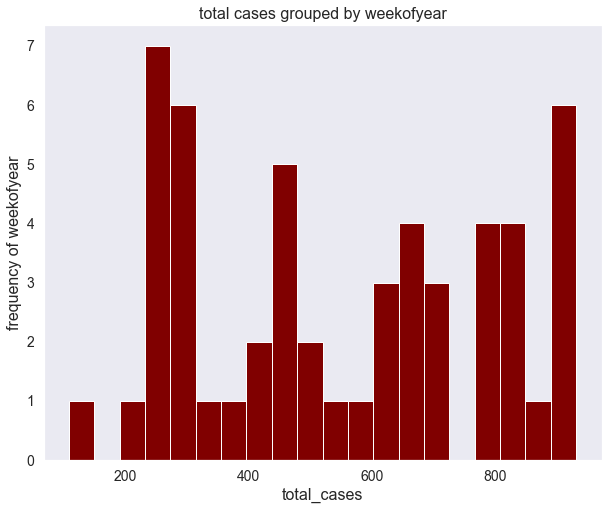

In [58]:
temp.hist(bins = 20,grid=False,color ="maroon", figsize=(10,8))
plt.xlabel("total_cases", fontsize=16)
plt.ylabel("frequency of weekofyear",fontsize=16)
plt.title("total cases grouped by weekofyear",fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

From the above output, we can say that
* There are 7 + 6 = 13 particular weeks of several years in the dataset when the sum of total cases of dengue is between 250 and 350.
* There are 2 empty bins indicating that there were no weeks 
 * when the sum of total cases were around 750 and lesser than 800 and 
 * when the sum of total cases is some around below 200 and above 150.
* There are 6 weeks having sum of total cases of dengue around 900.

# Assignment 2

In our analysis done before we have removed extreme outliers. Let's proceed with the dataset without outliers for our further processing.

In [59]:
#create a copy of the original merged dataframe
dengue = df_without_outliers.copy()

6. Preprocess the data (Encode the categorical features and Standardize the numerical features)

In my analysis, I have extracted months from week_start_date and created seasons considering grouping of 4 months together.
Assuming that predicting the cases of dengue during a particular season or month would be more useful than cases for the particular year, I have removed year attribute. Also, because the seasons for both the cities varies throughout the year.
To avoid the redundancy of data, I dropped week_start_date,weekofyear.

In [60]:
#create new columns by extracting the month from week_start_date
dengue["month"] = pd.to_datetime(dengue["week_start_date"]).dt.month
dengue["Jan_Apr"]= np.where(dengue["month"].isin([1,2,3,4]),1,0)
dengue["May_Aug"]= np.where(dengue["month"].isin([5,6,7,8]),1,0)
dengue["Sep_Dec"]= np.where(dengue["month"].isin([9,10,11,12]),1,0)
dengue = dengue.drop(["month","week_start_date"],axis =1)

Since, we have only two cities for city attribute, I have label encoded sj as 1 and iq as 0

In [61]:
#Label-Encoding on city attribute
from sklearn.preprocessing import LabelEncoder   
le = LabelEncoder() 
dengue['city']= le.fit_transform(dengue['city']) 

In [62]:
#create a dataframe for numerical attribute
dengue_num = dengue.drop(["city","Jan_Apr","May_Aug","Sep_Dec","year","weekofyear","total_cases"], axis =1)

In [63]:
# Standardize the numerical attributes
from sklearn.preprocessing import StandardScaler
sd = StandardScaler()
std_num_attr = pd.DataFrame(sd.fit_transform(dengue_num))

In [64]:
# assigning the columnn names
std_num_attr.columns = dengue_num.columns

In [65]:
std_num_attr.head()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,prec_amt_mm,re_an_air_temp_k,re_an_avg_temp_k,re_an_dew_point_temp_k,re_an_max_air_temp_k,re_an_min_air_temp_k,re_an_precip_amt_kg_per_m2,re_an_relative_hd_percent,re_an_sat_precip_amt_mm,re_an_specific_hd_g_per_kg,re_an_tdtr_k,stn_avg_temp_c,stn_diur_temp_rng_c,stn_max_temp_c,stn_min_temp_c,stn_precip_mm
0,0.442320,0.034315,1.859832,0.546317,-0.461561,-1.426933,-0.602360,-0.028806,1.198514,-1.015237,0.080413,1.428635,-0.461561,-0.049933,1.131948,-0.597656,1.260939,0.037112,-0.881714,-0.762082
1,0.614911,1.232240,1.164947,0.480042,0.338194,-1.504446,-0.619290,0.084900,0.982357,-1.796063,0.145265,1.590482,0.338194,0.086714,1.522811,-0.208177,1.633188,0.800543,-0.817905,0.343714
2,0.326081,0.374693,0.011824,-0.878753,0.222547,-1.664709,-1.437600,0.257323,0.333885,-1.210443,0.578456,1.906026,0.222547,0.252907,0.696760,-0.286073,1.586167,0.291589,-0.881714,-0.024184
3,0.693433,0.144007,0.688565,-0.014282,-0.911650,-2.440885,-2.357494,-1.586205,0.055968,-2.772094,-0.363395,0.707080,-0.911650,-1.484730,1.184332,-1.090997,1.147305,-0.471842,-4.710243,-0.194468
4,1.420722,1.615566,0.690881,1.907503,0.387042,-1.652139,-1.245721,-0.829408,1.105876,-1.639897,-0.182456,0.836120,0.387042,-0.830116,1.293129,-0.441865,1.592437,0.444275,-1.902655,-0.741060


In [66]:
# extract categorical and target columns
cat_tar_attr= dengue[['city','Jan_Apr','May_Aug','Sep_Dec','total_cases']]

In [67]:
cat_tar_attr.index = std_num_attr.index

In [68]:
#concat the numerical, categorical and target attributes after transformations
final_df = pd.concat([std_num_attr,cat_tar_attr],axis=1)

In [69]:
final_df.head()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,prec_amt_mm,re_an_air_temp_k,re_an_avg_temp_k,re_an_dew_point_temp_k,re_an_max_air_temp_k,re_an_min_air_temp_k,...,stn_avg_temp_c,stn_diur_temp_rng_c,stn_max_temp_c,stn_min_temp_c,stn_precip_mm,city,Jan_Apr,May_Aug,Sep_Dec,total_cases
0,0.442320,0.034315,1.859832,0.546317,-0.461561,-1.426933,-0.602360,-0.028806,1.198514,-1.015237,...,-0.597656,1.260939,0.037112,-0.881714,-0.762082,0,0,1,0,0
1,0.614911,1.232240,1.164947,0.480042,0.338194,-1.504446,-0.619290,0.084900,0.982357,-1.796063,...,-0.208177,1.633188,0.800543,-0.817905,0.343714,0,0,1,0,0
2,0.326081,0.374693,0.011824,-0.878753,0.222547,-1.664709,-1.437600,0.257323,0.333885,-1.210443,...,-0.286073,1.586167,0.291589,-0.881714,-0.024184,0,0,1,0,0
3,0.693433,0.144007,0.688565,-0.014282,-0.911650,-2.440885,-2.357494,-1.586205,0.055968,-2.772094,...,-1.090997,1.147305,-0.471842,-4.710243,-0.194468,0,0,1,0,0
4,1.420722,1.615566,0.690881,1.907503,0.387042,-1.652139,-1.245721,-0.829408,1.105876,-1.639897,...,-0.441865,1.592437,0.444275,-1.902655,-0.741060,0,0,1,0,0


In [70]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 25 columns):
ndvi_ne                       1429 non-null float64
ndvi_nw                       1429 non-null float64
ndvi_se                       1429 non-null float64
ndvi_sw                       1429 non-null float64
prec_amt_mm                   1429 non-null float64
re_an_air_temp_k              1429 non-null float64
re_an_avg_temp_k              1429 non-null float64
re_an_dew_point_temp_k        1429 non-null float64
re_an_max_air_temp_k          1429 non-null float64
re_an_min_air_temp_k          1429 non-null float64
re_an_precip_amt_kg_per_m2    1429 non-null float64
re_an_relative_hd_percent     1429 non-null float64
re_an_sat_precip_amt_mm       1429 non-null float64
re_an_specific_hd_g_per_kg    1429 non-null float64
re_an_tdtr_k                  1429 non-null float64
stn_avg_temp_c                1429 non-null float64
stn_diur_temp_rng_c           1429 non-null float64
stn_max_t

Convert the city,Jan_Apr,May_Aug,Sep_Dec into categorical datatype.

In [71]:
final_df.city = final_df["city"].astype("category")
final_df.Jan_Apr = final_df["Jan_Apr"].astype("category")
final_df.May_Aug = final_df["May_Aug"].astype("category")
final_df.Sep_Dec = final_df["Sep_Dec"].astype("category")
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 25 columns):
ndvi_ne                       1429 non-null float64
ndvi_nw                       1429 non-null float64
ndvi_se                       1429 non-null float64
ndvi_sw                       1429 non-null float64
prec_amt_mm                   1429 non-null float64
re_an_air_temp_k              1429 non-null float64
re_an_avg_temp_k              1429 non-null float64
re_an_dew_point_temp_k        1429 non-null float64
re_an_max_air_temp_k          1429 non-null float64
re_an_min_air_temp_k          1429 non-null float64
re_an_precip_amt_kg_per_m2    1429 non-null float64
re_an_relative_hd_percent     1429 non-null float64
re_an_sat_precip_amt_mm       1429 non-null float64
re_an_specific_hd_g_per_kg    1429 non-null float64
re_an_tdtr_k                  1429 non-null float64
stn_avg_temp_c                1429 non-null float64
stn_diur_temp_rng_c           1429 non-null float64
stn_max_t

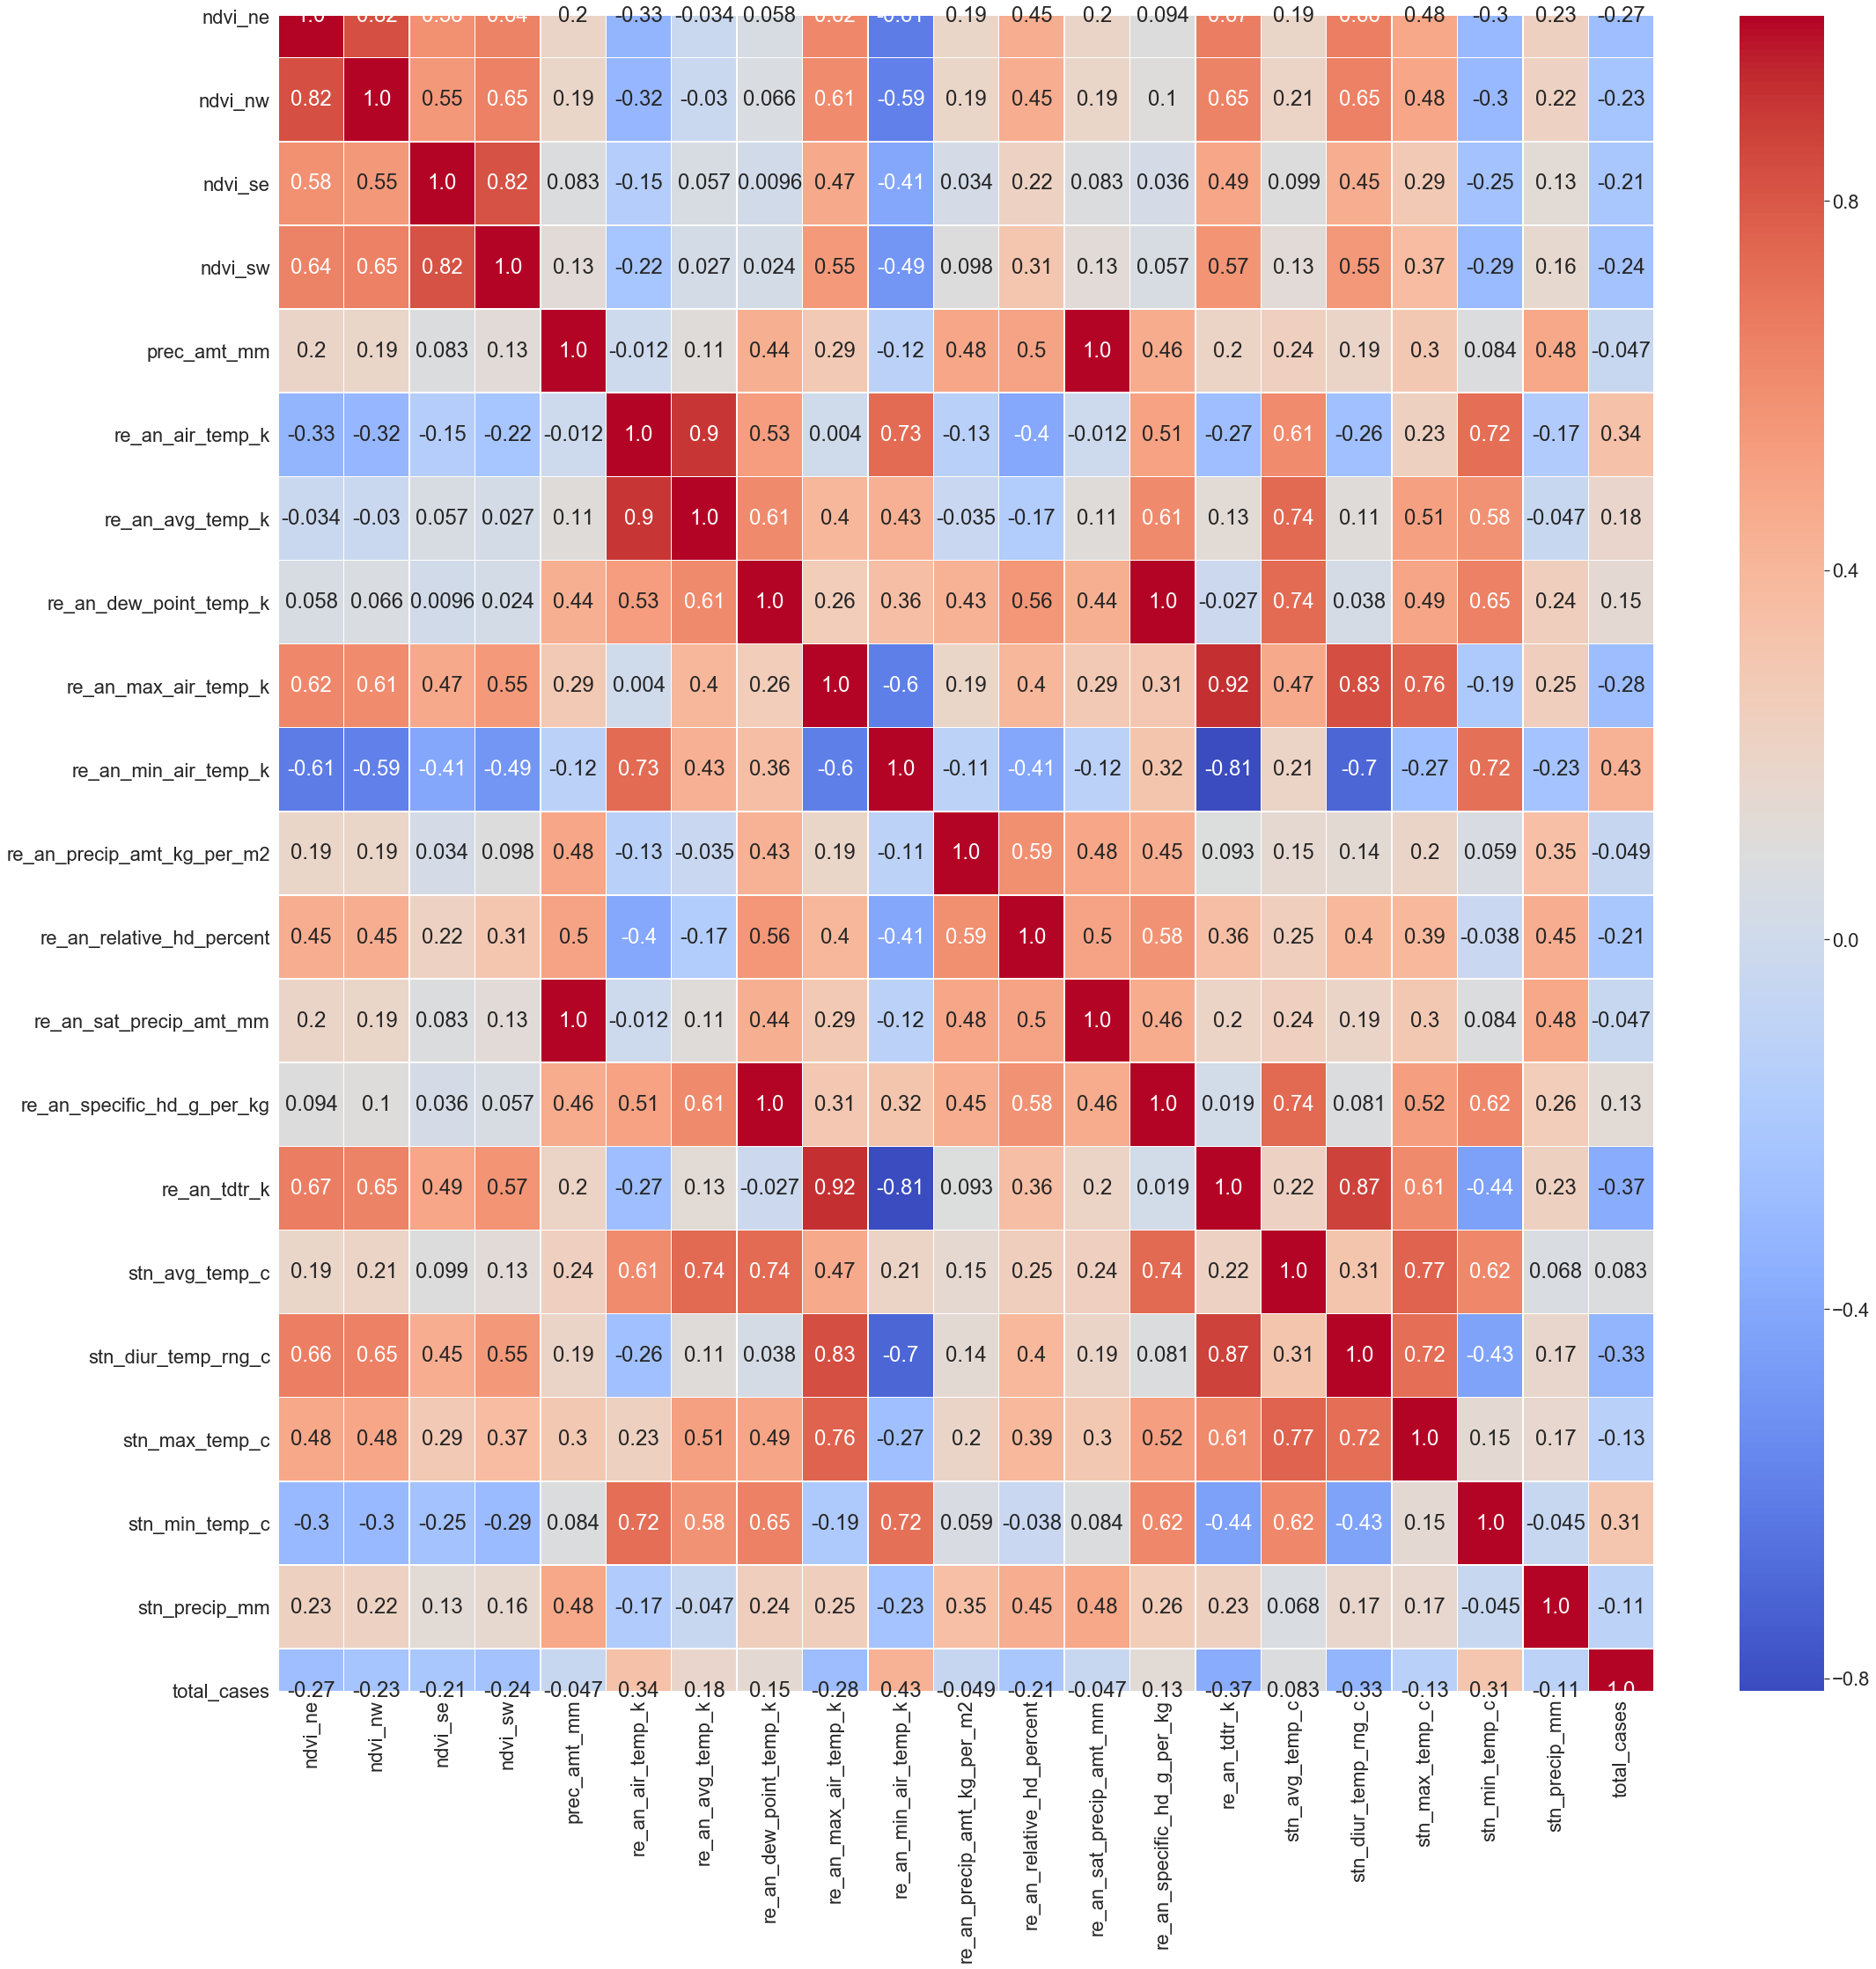

In [72]:
f, ax = plt.subplots(figsize=(35,35))
sns.heatmap(final_df.corr(), cmap="coolwarm",annot=True,fmt = ".2" ,linewidths=.5, ax=ax)

In [73]:
corr = final_df.corr()
corr["total_cases"].sort_values(ascending= False)

total_cases                   1.000000
re_an_min_air_temp_k          0.429738
re_an_air_temp_k              0.335996
stn_min_temp_c                0.309961
re_an_avg_temp_k              0.182768
re_an_dew_point_temp_k        0.147298
re_an_specific_hd_g_per_kg    0.131414
stn_avg_temp_c                0.082627
prec_amt_mm                  -0.046859
re_an_sat_precip_amt_mm      -0.046859
re_an_precip_amt_kg_per_m2   -0.048500
stn_precip_mm                -0.109880
stn_max_temp_c               -0.127285
re_an_relative_hd_percent    -0.205722
ndvi_se                      -0.207829
ndvi_nw                      -0.231746
ndvi_sw                      -0.243656
ndvi_ne                      -0.271235
re_an_max_air_temp_k         -0.277246
stn_diur_temp_rng_c          -0.326583
re_an_tdtr_k                 -0.374405
Name: total_cases, dtype: float64

From above correlation matrix, we can say that few of the attributes is not related to our target attribute and hence we can remove them from our further analysis. Here, I am considering the attributes that is more than .15 positively or negatively related to the total cases.

In [74]:
# create a dataframe with important features
imp_feat = final_df.drop(["prec_amt_mm","re_an_dew_point_temp_k",
                          "re_an_precip_amt_kg_per_m2",
                          "re_an_sat_precip_amt_mm","re_an_specific_hd_g_per_kg",
                          "stn_avg_temp_c","stn_max_temp_c","stn_precip_mm"],axis = 1
                          )

7. Make an 80-20 stratified split based on the target data

In [75]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(imp_feat,imp_feat["city"]):
    strat_train_set = imp_feat.loc[train_index]
    strat_test_set = imp_feat.loc[test_index]

Verify splitting, check for the ratio of cities in both train and test dataset

In [76]:
strat_train_set["city"].value_counts()/len(strat_train_set)   

1    0.641295
0    0.358705
Name: city, dtype: float64

In [77]:
strat_test_set["city"].value_counts()/len(strat_test_set)   

1    0.63986
0    0.36014
Name: city, dtype: float64

In [78]:
# drop the target coulmn and create a target variable dataframe separately
train = strat_train_set.drop("total_cases", axis = 1)
train_target = strat_train_set["total_cases"].copy()
test = strat_test_set.drop("total_cases", axis = 1)
test_target = strat_test_set["total_cases"].copy()

8. Build a stochastic gradient descent regressor, train the model

In [79]:
#train the data using SGDRegressor model
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor()
result = sgd_reg.fit(train,train_target)

In [80]:
# predictions on target data
dengue_predictions =  sgd_reg.predict(test)

9. Evaluate your model based on applicable metrics. Show the metric(s) you chose and why you chose this(these) metrics.

In [81]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
sgd_mae = mean_absolute_error(test_target,dengue_predictions)
sgd_mse = mean_squared_error(test_target,dengue_predictions)
sgd_rmse = np.sqrt(sgd_mse)
r2score = r2_score(test_target,dengue_predictions)

In [82]:
print("mean absolute error:",sgd_mae)
print("mean squared error:",sgd_mse)
print("root mean squared error:",sgd_rmse)
print("R2 score:",r2score)

mean absolute error: 15.755923450384
mean squared error: 690.1656661212152
root mean squared error: 26.27100428459512
R2 score: 0.2359665556116386


I calculated mean absolute error and mean squared error and root mean squared error for evaluation of stochastic gradeint descent model above.

Since our target attribute,total_cases is a continuous variable for the prediction of which we will be calculating the accuracy using the regression model, I have considered above mentioned metrics as evaluation metrics.I mainly focussed on Mean Absolute Error because it will consider the equal weight of all individual difference between prectiction and actual observation of total cases. This helps in quantifying our results properly.

10. List the hyper-parameters that can be tuned in SGD. Show the code along with comments on the parameter value chosen (use class presentation, discussion notes, some online reading) and why this value was chosen. Show the improvement you achieved in model accuracy. 

In [83]:
from sklearn.model_selection import GridSearchCV
param_grid = [
        {"eta0" :[1,0.1,0.01,0.001,0.0001], 
         "max_iter" : [50,100,1000]
        }
        ]
grid = GridSearchCV(sgd_reg, param_grid,scoring = "neg_mean_absolute_error",
                    return_train_score= True)
grid.fit(train,train_target)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\li

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SGDRegressor(alpha=0.0001, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=0.01, fit_intercept=True,
                                    l1_ratio=0.15, learning_rate='invscaling',
                                    loss='squared_loss', max_iter=1000,
                                    n_iter_no_change=5, penalty='l2',
                                    power_t=0.25, random_state=None,
                                    shuffle=True, tol=0.001,
                                    validation_fraction=0.1, verbose=0,
                                    warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'eta0': [1, 0.1, 0.01, 0.001, 0.0001],
                          'max_iter': [50, 100, 1000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_m

In [84]:
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_params_)

-13.84073237400198
{'eta0': 0.1, 'max_iter': 1000}


In [85]:
cvres = grid.cv_results_
for mae , params in zip(cvres["mean_test_score"],cvres["params"]):
    print(mae,params)

-1341063.4446635332 {'eta0': 1, 'max_iter': 50}
-549435.4297924412 {'eta0': 1, 'max_iter': 100}
-992715.7472468419 {'eta0': 1, 'max_iter': 1000}
-14.465993250772854 {'eta0': 0.1, 'max_iter': 50}
-15.03107087188547 {'eta0': 0.1, 'max_iter': 100}
-13.84073237400198 {'eta0': 0.1, 'max_iter': 1000}
-14.099405024676573 {'eta0': 0.01, 'max_iter': 50}
-14.228625303662112 {'eta0': 0.01, 'max_iter': 100}
-14.26684769462329 {'eta0': 0.01, 'max_iter': 1000}
-14.031583294603829 {'eta0': 0.001, 'max_iter': 50}
-14.095978167634449 {'eta0': 0.001, 'max_iter': 100}
-14.190065863742738 {'eta0': 0.001, 'max_iter': 1000}
-14.97022221085546 {'eta0': 0.0001, 'max_iter': 50}
-14.02954239702144 {'eta0': 0.0001, 'max_iter': 100}
-14.025358609342936 {'eta0': 0.0001, 'max_iter': 1000}


I implemented grid search for finding the combination of hyperparameter values to fine tune the model. Below hyperparameters were used:-
* max_iter=1000
* eta0=0.0001

From above grid we can see that if learning rate is more when 1, the model doesn't reach the global minima and moves far away while the cost fuction reduces to minimum when no. of epoch is 1000 and learning rate is 0.0001.

In [86]:
sgd_reg = SGDRegressor(max_iter=1000,eta0=0.0001)
result = sgd_reg.fit(train,train_target)
dengue_predictions =  sgd_reg.predict(test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [87]:
sgd_mae = mean_absolute_error(test_target,dengue_predictions)
sgd_mse = mean_squared_error(test_target,dengue_predictions)
sgd_rmse = np.sqrt(sgd_mse)
r2score = r2_score(test_target,dengue_predictions)

In [88]:
print("mean absolute error:",sgd_mae)
print("mean squared error:",sgd_mse)
print("root mean squared error:",sgd_rmse)
print("R2 score:",r2score)

mean absolute error: 15.914266497111795
mean squared error: 696.3913790741946
root mean squared error: 26.38922846682325
R2 score: 0.2290745104915578


On introducing the hypermeters,we see that there is slight reduction in Mean Absolute Error which helps in predicting the cases of dengue more accurately.

11. Plot Learning curve and provide insights

In [89]:
from sklearn.model_selection import learning_curve

In [90]:
train_set_size, train_error,cv_error= learning_curve(sgd_reg,train,train_target,cv=2,
                                            train_sizes= np.linspace(0.01, 1.0, 50),
                                            scoring = "neg_mean_absolute_error")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packag

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packag

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packag

In [91]:
train_errs_mean = -train_error.mean(axis = 1)
cv_errs_mean = -cv_error.mean(axis = 1)

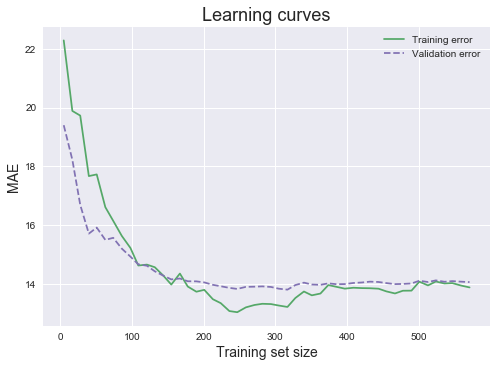

In [92]:
plt.style.use('seaborn')
plt.plot(train_set_size,train_errs_mean,"g-", label = 'Training error')
plt.plot(train_set_size, cv_errs_mean,"--m", label = 'Validation error')
plt.ylabel('MAE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18)
plt.legend()
plt.show()

The Learning curve above shows that :
    * The MAE for the training data decreases as the size of train dataset increases. 
    * The MAE for the validation data decreases too with a small gap with the training error.
The gap between training and validation loss learning curve is a "generalization gap" which seems to be less here. As the model is shown more training examples, it learns and thus the validation error goes down.It means the model generalizes well.

## Perform the same analysis on dengue_features_test and create submission file

In [93]:
dengue_features_test = pd.read_csv("dengue_features_test.csv")

In [94]:
dengue_features_test.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [95]:
dengue_features_test["month"] = pd.to_datetime(dengue_features_test["week_start_date"]).dt.month
dengue_features_test["Jan_Apr"]= np.where(dengue_features_test["month"].isin([1,2,3,4]),1,0)
dengue_features_test["May_Aug"]= np.where(dengue_features_test["month"].isin([5,6,7,8]),1,0)
dengue_features_test["Sep_Dec"]= np.where(dengue_features_test["month"].isin([9,10,11,12]),1,0)
dengue_features_test = dengue_features_test.drop(["month","week_start_date"],axis =1)

In [96]:
#Label-Encoding on city attribute
from sklearn.preprocessing import LabelEncoder   
le = LabelEncoder() 
dengue_features_test['city']= le.fit_transform(dengue_features_test['city']) 

In [97]:
#create a dataframe for numerical attribute
dengue_num_test = dengue_features_test.drop(["city","Jan_Apr","May_Aug","Sep_Dec"], axis =1)

In [98]:
# Standardize the numerical attributes
std_num_attr_test = pd.DataFrame(sd.fit_transform(dengue_num_test))


In [99]:
std_num_attr_test.columns = dengue_num_test.columns

In [100]:
std_num_attr_test.head()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,-1.930646,-0.564156,-0.883128,-1.031563,-1.328663,-1.202404,1.145666,-0.221730,-0.615543,-0.586380,...,-0.343930,-0.504576,1.145666,-0.648153,-0.564066,-0.683152,-0.308110,0.399027,-0.386600,1.182229
1,-1.930646,-0.497312,-0.877645,-0.985544,-1.590486,-1.407869,-0.734282,-0.233410,-0.610068,-0.672775,...,-0.416396,-0.579403,-0.734282,-0.729865,-0.721514,-1.054486,-0.921185,-1.321423,-0.097467,0.000619
2,-1.930646,-0.430468,-0.777116,NaN,-0.716629,-1.198829,-0.987637,0.434290,0.003121,-0.072708,...,-0.778932,-0.573975,-0.987637,-0.162471,-0.196688,0.454060,-0.010331,0.138353,0.249493,-0.903646
3,-1.930646,-0.363624,NaN,-1.038407,-1.055268,-0.827219,-1.091825,0.593915,0.287816,-0.668080,...,-0.818235,-1.286969,-1.091825,-0.739964,-0.220911,0.558498,-0.629244,0.399027,1.174718,-0.981649
4,-1.930646,-0.296780,-0.421915,-0.615737,-1.840797,-1.368703,-1.070191,0.655235,0.244017,-0.433312,...,-0.774019,-1.141967,-1.070191,-0.507681,-0.446989,0.198767,-0.296432,0.399027,0.538625,1.439352


In [101]:
# extract categorical and target columns
cat_tar_attr_test= dengue_features_test[['city','Jan_Apr','May_Aug','Sep_Dec']]

In [102]:
cat_tar_attr_test.index = std_num_attr_test.index

In [103]:
#concat the numerical, categorical and target attributes after transformations
final_df_test = pd.concat([std_num_attr_test,cat_tar_attr_test],axis=1)

In [104]:
final_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 26 columns):
year                                     416 non-null float64
weekofyear                               416 non-null float64
ndvi_ne                                  373 non-null float64
ndvi_nw                                  405 non-null float64
ndvi_se                                  415 non-null float64
ndvi_sw                                  415 non-null float64
precipitation_amt_mm                     414 non-null float64
reanalysis_air_temp_k                    414 non-null float64
reanalysis_avg_temp_k                    414 non-null float64
reanalysis_dew_point_temp_k              414 non-null float64
reanalysis_max_air_temp_k                414 non-null float64
reanalysis_min_air_temp_k                414 non-null float64
reanalysis_precip_amt_kg_per_m2          414 non-null float64
reanalysis_relative_humidity_percent     414 non-null float64
reanalysis_sat_precip_amt_m

In [105]:
final_df_test.city = final_df_test["city"].astype("category")
final_df_test.Jan_Apr = final_df_test["Jan_Apr"].astype("category")
final_df_test.May_Aug = final_df_test["May_Aug"].astype("category")
final_df_test.Sep_Dec = final_df_test["Sep_Dec"].astype("category")
final_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 26 columns):
year                                     416 non-null float64
weekofyear                               416 non-null float64
ndvi_ne                                  373 non-null float64
ndvi_nw                                  405 non-null float64
ndvi_se                                  415 non-null float64
ndvi_sw                                  415 non-null float64
precipitation_amt_mm                     414 non-null float64
reanalysis_air_temp_k                    414 non-null float64
reanalysis_avg_temp_k                    414 non-null float64
reanalysis_dew_point_temp_k              414 non-null float64
reanalysis_max_air_temp_k                414 non-null float64
reanalysis_min_air_temp_k                414 non-null float64
reanalysis_precip_amt_kg_per_m2          414 non-null float64
reanalysis_relative_humidity_percent     414 non-null float64
reanalysis_sat_precip_amt_m

In [106]:
final_df_test.isna().sum()

year                                      0
weekofyear                                0
ndvi_ne                                  43
ndvi_nw                                  11
ndvi_se                                   1
ndvi_sw                                   1
precipitation_amt_mm                      2
reanalysis_air_temp_k                     2
reanalysis_avg_temp_k                     2
reanalysis_dew_point_temp_k               2
reanalysis_max_air_temp_k                 2
reanalysis_min_air_temp_k                 2
reanalysis_precip_amt_kg_per_m2           2
reanalysis_relative_humidity_percent      2
reanalysis_sat_precip_amt_mm              2
reanalysis_specific_humidity_g_per_kg     2
reanalysis_tdtr_k                         2
station_avg_temp_c                       12
station_diur_temp_rng_c                  12
station_max_temp_c                        3
station_min_temp_c                        9
station_precip_mm                         5
city                            

In [107]:
final_df_test = final_df_test.fillna(method="ffill")
final_df_test.isna().sum()

year                                     0
weekofyear                               0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
city                                     0
Jan_Apr    

In [108]:
# create a dataframe with important features
imp_feat_test = final_df_test.drop(["precipitation_amt_mm","reanalysis_dew_point_temp_k",
                          "reanalysis_precip_amt_kg_per_m2",
                          "reanalysis_sat_precip_amt_mm","reanalysis_specific_humidity_g_per_kg",
                          "station_avg_temp_c","station_max_temp_c","station_precip_mm",'year','weekofyear'],axis = 1
                          )

In [109]:
imp_feat.columns

Index(['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 're_an_air_temp_k',
       're_an_avg_temp_k', 're_an_max_air_temp_k', 're_an_min_air_temp_k',
       're_an_relative_hd_percent', 're_an_tdtr_k', 'stn_diur_temp_rng_c',
       'stn_min_temp_c', 'city', 'Jan_Apr', 'May_Aug', 'Sep_Dec',
       'total_cases'],
      dtype='object')

In [110]:
imp_feat_test.columns

Index(['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_max_air_temp_k',
       'reanalysis_min_air_temp_k', 'reanalysis_relative_humidity_percent',
       'reanalysis_tdtr_k', 'station_diur_temp_rng_c', 'station_min_temp_c',
       'city', 'Jan_Apr', 'May_Aug', 'Sep_Dec'],
      dtype='object')

In [111]:
sgd_reg = SGDRegressor(max_iter=100,eta0=0.0001)
result = sgd_reg.fit(train,train_target)
dengue_predictions_test =  sgd_reg.predict(imp_feat_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [112]:
#Create a  DataFrame with the city,months divided,and total cases
submission = pd.DataFrame({'city':dengue_features_test['city'],'year': dengue_features_test['year'],'weekofyear':dengue_features_test['weekofyear'],
                           'total_cases':dengue_predictions_test})
#Visualize the first 5 rows
submission.head()

,city,year,weekofyear,total_cases
0,1,2008,18,19.858904
1,1,2008,19,20.844847
2,1,2008,20,20.189436
3,1,2008,21,23.024187
4,1,2008,22,23.616864


In [113]:
#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as notebook
filename = 'Dengue_Prediction_Submission_final.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)

Saved file: Dengue_Prediction_Submission_final.csv
